# AI in Action

# Introduction 

Negotiation is a dialogue between two or more parties aimed at reaching a consensus or resolving a conflict. It is a fundamental aspect of human interaction, whether in business, politics, or personal relationships. Effective negotiation involves understanding the interests and goals of all parties, communicating clearly, and finding mutually beneficial solutions.

In this project, we will explore the use of data and machine learning to predict the outcomes of negotiations. By analyzing historical negotiation data, we aim to develop a system that can assist negotiators in making informed decisions and improving their chances of success. This system, named "Negoisst," will leverage dialogue data to provide insights and predictions about the negotiation process.

This project is a collaborative effort by four members: Maxim Gerassimenya, Theodoros Koletsis, Tarkan Yildirim, and Julius Hirsch.

## Agenda

1. **Data Exploration**
   - Understanding the dataset
   - Identifying key features and variables
   - Initial data visualization

2. **Data Cleansing**
   - Handling missing values
   - Removing duplicates
   - Correcting data inconsistencies

3. **Pre-processing**
   - Normalizing and scaling data
   - Encoding categorical variables
   - Splitting data into training and testing sets

4. **Representation Techniques**
   - Feature engineering
   - Dimensionality reduction
   - Text representation methods (e.g., TF-IDF, word embeddings)

5. **Machine Learning Techniques Application/Modeling of Data**
   - Selecting appropriate machine learning models
   - Training and tuning models
   - Evaluating model performance
   - Making predictions and interpreting results

## Data Exploration

In [31]:
# Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Text processing
import string
import re
import warnings
warnings.filterwarnings('ignore')

# Install and import nltk and upprade if necessary libraries
#%pip install nltk
import nltk
#%pip install --upgrade pandas
#%pip install openpyxl --upgrade

In [32]:
# Read excel file
df = pd.read_excel('Group1.xlsx')


In [33]:
df # 2332 observations and 5 columns

SenderID  ReceiverID    ActionType  NegoOutcome  \
0           70          69         Offer  FinalAccept   
1           69          70  Counteroffer  FinalAccept   
2           70          69  Counteroffer  FinalAccept   
3           69          70  Counteroffer  FinalAccept   
4           70          69  Counteroffer  FinalAccept   
...        ...         ...           ...          ...   
2327       851         856  Counteroffer  FinalReject   
2328       856         851  Counteroffer  FinalReject   
2329       851         856  Counteroffer  FinalReject   
2330       856         851  Counteroffer  FinalReject   
2331       851         856   FinalReject  FinalReject   

                                                Content  
0     Dear Mr. Mendel, \nHope you are doing well! \n...  
1     Dear Mr. Novak, \nThank you for reaching out t...  
2     Dear Mr. Mendel, \nThank your kind response – ...  
3     Dear Mr. Novak, \nThank you for your swift rep...  
4     Dear Mr. Mendel, \nThank you for your proposal...  
...                                                 ...  
2327  Dear Chis Meyer,\n \nthank you for your latest...  
2328  Dear Alex Kramer,\nthank you very much for you...  
2329  Dear Chris Meyer,\nthank you for your fast ans...  
2330  Dear Alex Kramer,\nI am still very interested ...  
2331  Dear Chris Meyer,\n \nI'm so sorry but I can n...  

[2332 rows x 5 columns]

##### Missing values and Duplicates

In [34]:
# Check for missing values
df.isnull().sum()

SenderID       0
ReceiverID     0
ActionType     0
NegoOutcome    0
Content        0
dtype: int64

The datasaet does not contain any missing values thus this leads to the conclucsion that we will not need to handle missing values at all. However it has some duplicates values (8 in total) that may be considered an preprocessed to prevent errors in the further analysis.

In [35]:
# Check for duplicates
df.duplicated().sum()
# List all the duplicates in a separate df
duplicates = df[df.duplicated()]
duplicates

SenderID  ReceiverID    ActionType  NegoOutcome  \
215        965         966  Counteroffer  FinalAccept   
270       1105        1106  Counteroffer  FinalReject   
400       1441        1442  Counteroffer  FinalReject   
470       1833        1834   FinalAccept  FinalAccept   
731       3037        3038  Counteroffer  FinalAccept   
929       3877        3878  Counteroffer  FinalAccept   
1555        48          47  Counteroffer  FinalAccept   
1747        48          47  Counteroffer  FinalAccept   

                                                Content  
215   Dear Mr.Novak, \nI am so glad both of our side...  
270   Dear Ms. Novak, \nI assure you that there is n...  
400   Thank you for sending me your first offer. Alt...  
470   So, Ms. Novak, this is our official acceptance...  
731   Dear Mr. Novak, \nI would really like to close...  
929   Dear Sasa, of course you agree with the direct...  
1555  Dear Mr. Kramer, sorry for my late response, b...  
1747  Dear Mr. Kramer, sorry for my late response, b...

## Analyzing text statistics

We will begin by running text statistics visualizations some very insightful techniques.

They include:

word frequency analysis,
sentence length analysis,
average word length analysis,
etc.
Those really help explore the fundamental characteristics of the text data.

To do so, we will be mostly using histograms (continuous data) and bar charts (categorical data).

First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the content's length.

## Average Length of Content/Sentence and Word

In [36]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize

# Assuming df is your DataFrame and 'Content' is the column with text data
df['Content_Length'] = df['Content'].apply(len)
df['Sentence_Count'] = df['Content'].apply(lambda x: len(sent_tokenize(x)))
df['Word_Count'] = df['Content'].apply(lambda x: len(word_tokenize(x)))

# Calculate averages
average_content_length = df['Content_Length'].mean()
average_sentence_length = df['Content_Length'].sum() / df['Sentence_Count'].sum()
average_word_length = df['Content_Length'].sum() / df['Word_Count'].sum()

print(f"Average Content Length: {average_content_length}")
print(f"Average Sentence Length: {average_sentence_length}")
print(f"Average Word Length: {average_word_length}")

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


Average Content Length: 1291.4202401372213
Average Sentence Length: 98.42768898911658
Average Word Length: 5.03256403100827


<Axes: >

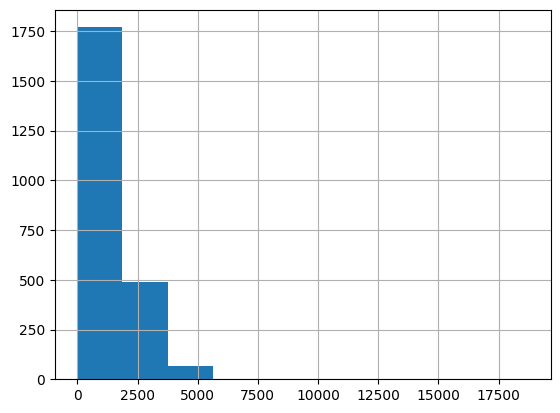

In [37]:
df['Content'].str.len().hist()

The histogram shows that Content range from 0 to 5200 characters and generally, it is between 0 to 1500 characters.

Now, we will move on to data exploration at a word-level. Let’s plot the number of words appearing in each Content.

<Axes: >

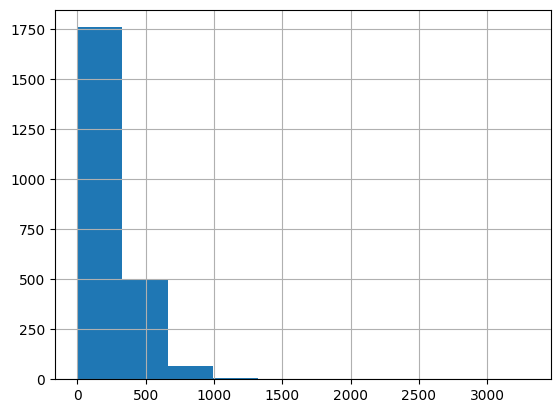

In [38]:
df["Content"].str.split().map(lambda x: len(x)).hist()


It is clear that the number of words in the content columns ranges from 0 to 500 and mostly falls between 100 to 300 words.

Up next, let’s check the average word length in each sentence.

<Axes: >

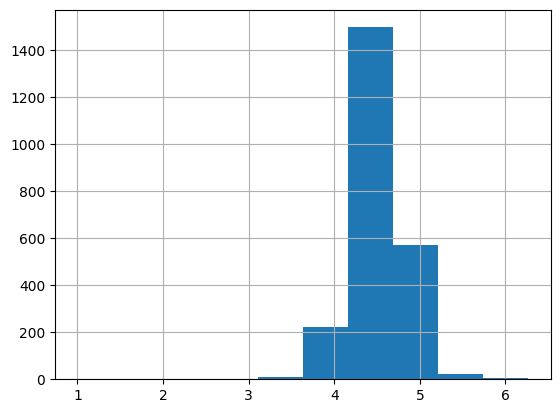

In [39]:
df['Content'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()


We note that the avg word length is around 3-6 words per sentence. Does this imply that the users are using really short sentecens or are they using short words, we will find out in the next steps.

One reason why this may not be true is stopwords. Stopwords are the words that are most commonly used in any language such as “the”,” a”,” an” etc. As these words are probably small in length these words may have caused the above graph to be right-skewed.

Analyzing the amount and the types of stopwords can give us some good insights into the data.

To get the corpus containing stopwords you can use the nltk library. Nltk contains stopwords from many languages. Since we are only dealing with English news I will filter the English stopwords from the corpus.

In [40]:
# Check the length of the content
df["length"] = df["Content"].str.len()  
df.head()

SenderID  ReceiverID    ActionType  NegoOutcome  \
0        70          69         Offer  FinalAccept   
1        69          70  Counteroffer  FinalAccept   
2        70          69  Counteroffer  FinalAccept   
3        69          70  Counteroffer  FinalAccept   
4        70          69  Counteroffer  FinalAccept   

                                             Content  Content_Length  \
0  Dear Mr. Mendel, \nHope you are doing well! \n...            2529   
1  Dear Mr. Novak, \nThank you for reaching out t...            2579   
2  Dear Mr. Mendel, \nThank your kind response – ...            2336   
3  Dear Mr. Novak, \nThank you for your swift rep...            1961   
4  Dear Mr. Mendel, \nThank you for your proposal...            1917   

   Sentence_Count  Word_Count  length  
0              17         470    2529  
1              21         483    2579  
2              15         454    2336  
3              13         381    1961  
4              10         376    1917

In [41]:
# Word Count of each message
def word_count(content):
    content_list = content.split()
    return len(content.split())

df['WordCount'] = df['Content'].apply(word_count)
df.head()

SenderID  ReceiverID    ActionType  NegoOutcome  \
0        70          69         Offer  FinalAccept   
1        69          70  Counteroffer  FinalAccept   
2        70          69  Counteroffer  FinalAccept   
3        69          70  Counteroffer  FinalAccept   
4        70          69  Counteroffer  FinalAccept   

                                             Content  Content_Length  \
0  Dear Mr. Mendel, \nHope you are doing well! \n...            2529   
1  Dear Mr. Novak, \nThank you for reaching out t...            2579   
2  Dear Mr. Mendel, \nThank your kind response – ...            2336   
3  Dear Mr. Novak, \nThank you for your swift rep...            1961   
4  Dear Mr. Mendel, \nThank you for your proposal...            1917   

   Sentence_Count  Word_Count  length  WordCount  
0              17         470    2529        429  
1              21         483    2579        439  
2              15         454    2336        409  
3              13         381    1961        345  
4              10         376    1917        343

In [42]:
df["NegoOutcome"].value_counts() # The result shows us that the data is imbalanced but not as strong since there are 1604 accepts and 728 rejections

NegoOutcome
FinalAccept    1604
FinalReject     728
Name: count, dtype: int64

In [43]:
# Look into the acceptance and rejection messages
accepted_messages = df[df["NegoOutcome"] == "FinalAccept"]["Content"]
rejected_messages = df[df["NegoOutcome"] == "FinalReject"]["Content"]

# Print accepted message
accepted_messages.values[1]

"Dear Mr. Novak, \nThank you for reaching out to me!I apologize for the slight delay in getting back to you, my colleagues and I are in the midst of preparing for our upcoming joint venture and we couldn't be more excited! As you already know, my name is Finn Mendel and I will be your correspondence for this period of time of solidifying the agreements between Hurm AG and SVN Tech respectively. \nI have read your proposal for the open issues of our joint venture, however I have some thoughts on what you have discussed. Below is my explanation:\xa0 \n \n Directors \n \nWhile we have agreed on the 5 members with a simple majority power, we believe having 4 members from Hurm AG will be more suitable for this venture. This is because our directors are extremely experienced and have completed multiple joint ventures before with other European countries. However, we will need 1 from SVN Tech for, as you mentioned previously, to deal with local authorities and partners successfully.\xa0 \n \n

In [44]:
# Print rejected message
rejected_messages.values[1]

'Dear Mr Novak, \nI am pleased to hear that you are happy about the joint venture because so are we at Hurm AG. I would like to thank you in advance for stipulating your points of discussion for us to make this partnership a reality. \nIn regards to the "board of directors", I would like Hurm AG to have 4 seats in the board. Since it is important for our company to carry the vision of our company throughout the project till its final stage of course with the help of SVN Tech representative in the board to provide the support and knowhow to realize our vision. \nIn regards to our engineers stay in Slovenia, it is impossible for them to stay that long due to their production commitments here Switzerland to ensure the success of our joint project. If needed, our engineers can stay in Slovenia for a maximum of 6 months to help to start the project and eventually train the staff. As for the additional compensation of the workers I do agree with the 15% paid by SVN proposed by you. \nFor the

In [45]:
# Test to see if the df has the correct number of rows
accepted_count = accepted_messages.count()
rejected_count = rejected_messages.count()

accepted_count, rejected_count


(1604, 728)

##### Length of words/sentences

In [46]:
# Check if the sum of the two counts is equal to the total number of rows in the df
df.shape

(2332, 10)

The test showed us that the df indeed has the correct number of rows it also has in total 2332 observation and 7 parametric variables. We will run some summary statistics to see the distribution and further insights into the dataset that may helkp us for the analysis and NLP techniques.

In [47]:
# Summary statistics
print(df.describe())
print(df.describe(include=['O']))  # For categorical features



           SenderID    ReceiverID  Content_Length  Sentence_Count  \
count   2332.000000   2332.000000     2332.000000     2332.000000   
mean    1849.926244   1849.963551     1291.420240       13.120497   
std     6614.148794   6614.152981     1108.602775       10.435871   
min       31.000000     31.000000        1.000000        1.000000   
25%      178.000000    178.000000      499.000000        6.000000   
50%      462.000000    462.000000      998.000000       10.000000   
75%     2095.000000   2095.000000     1829.250000       18.000000   
max    67766.000000  67766.000000    18737.000000      182.000000   

        Word_Count        length    WordCount  
count  2332.000000   2332.000000  2332.000000  
mean    256.612779   1291.420240   230.884220  
std     216.918060   1108.602775   195.871096  
min       1.000000      1.000000     1.000000  
25%     102.000000    499.000000    90.000000  
50%     202.000000    998.000000   181.000000  
75%     363.250000   1829.250000   328.000

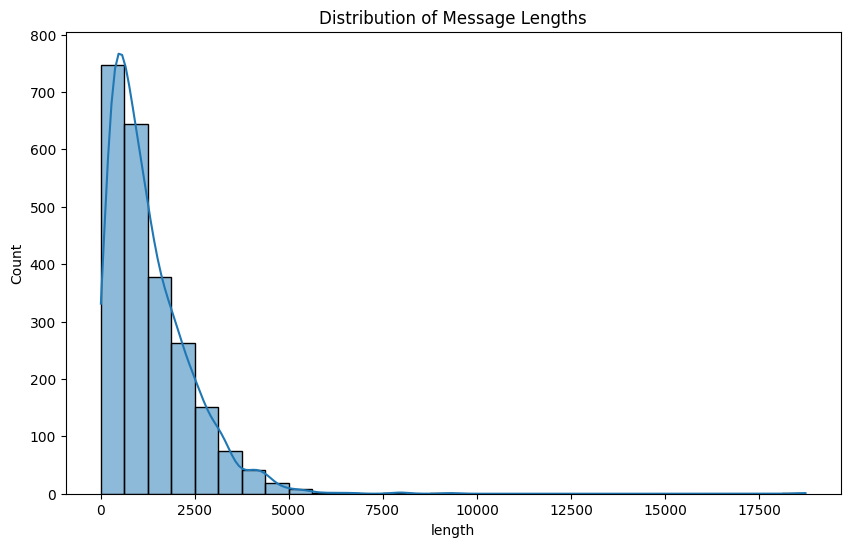

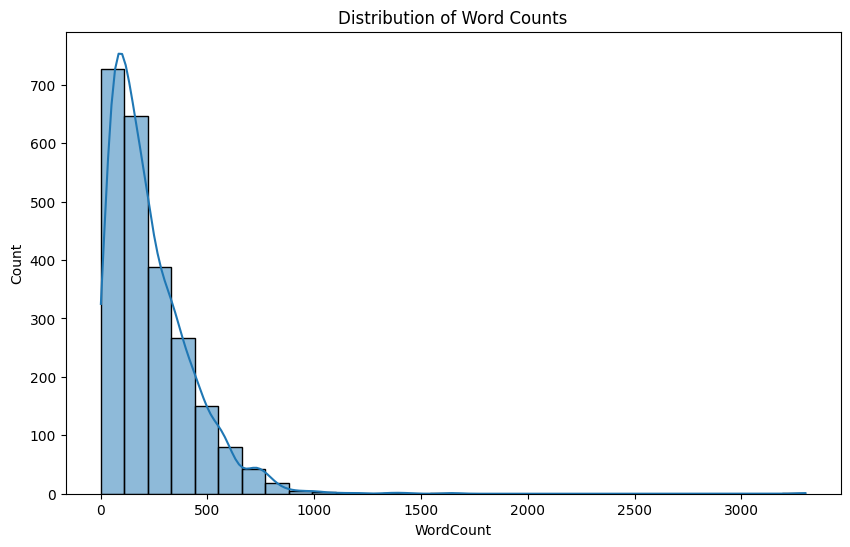

In [48]:
# Visualize the distribution of message lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], bins=30, kde=True)
plt.title('Distribution of Message Lengths')
plt.show()

# Visualize the distribution of word counts
plt.figure(figsize=(10, 6))
sns.histplot(df['WordCount'], bins=30, kde=True)
plt.title('Distribution of Word Counts')
plt.show()

The results show that the distribution of message lengths and word counts are right-skewed since it has a long right tail and mostly concentrated on the left side of the graph. We may need to transform the data or preprocess it better to reach better results

In [49]:
#%pip install scikitlearn-learn
df["NegoOutcomeLabel"] = df["NegoOutcome"].map({"FinalAccept": 1 , "FinalReject": 0})
df.head()

SenderID  ReceiverID    ActionType  NegoOutcome  \
0        70          69         Offer  FinalAccept   
1        69          70  Counteroffer  FinalAccept   
2        70          69  Counteroffer  FinalAccept   
3        69          70  Counteroffer  FinalAccept   
4        70          69  Counteroffer  FinalAccept   

                                             Content  Content_Length  \
0  Dear Mr. Mendel, \nHope you are doing well! \n...            2529   
1  Dear Mr. Novak, \nThank you for reaching out t...            2579   
2  Dear Mr. Mendel, \nThank your kind response – ...            2336   
3  Dear Mr. Novak, \nThank you for your swift rep...            1961   
4  Dear Mr. Mendel, \nThank you for your proposal...            1917   

   Sentence_Count  Word_Count  length  WordCount  NegoOutcomeLabel  
0              17         470    2529        429                 1  
1              21         483    2579        439                 1  
2              15         454    2336        409                 1  
3              13         381    1961        345                 1  
4              10         376    1917        343                 1

Now we will run a topic analysis and generate a WordCloud to visualize the most common words in the accepted and rejected messages. Therefore as usual we will download new installments to conduct the analysis.

In [50]:
#%pip install wordcloud

(-0.5, 799.5, 399.5, -0.5)

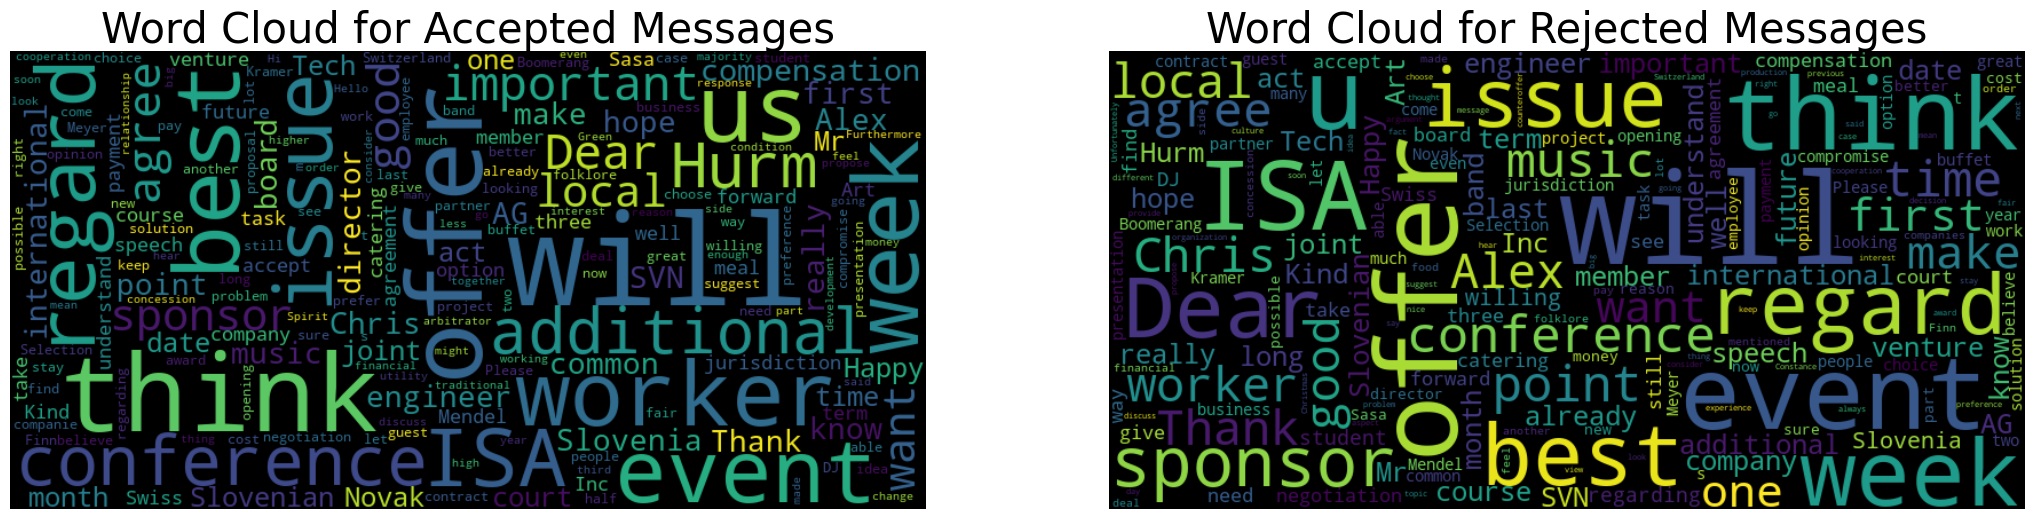

In [51]:
from wordcloud import WordCloud

# Create a worcloud for the accepted messages
fix, (ax1,ax2) = plt.subplots(1, 2, figsize=(26, 8))

# Create a word cloud separetely for accepted and rejected messages
wordcloud_accepted = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(' '.join(accepted_messages))
wordcloud_rejected = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(' '.join(rejected_messages))

# Plot the word clouds
ax1.imshow(wordcloud_accepted, interpolation='bilinear')
ax1.set_title('Word Cloud for Accepted Messages', fontsize=30)
ax1.axis('off')

ax2.imshow(wordcloud_rejected, interpolation='bilinear')
ax2.set_title('Word Cloud for Rejected Messages', fontsize=30)
ax2.axis('off')


The respective wordclouds do not seem to have much space for interpretability since the used words do not seem to have a clear meaning and are just random used words that just happened to be used often. To prevent this we will need to practice a better data cleansing because how it is right we will not be able to run NLP techniques at all with these data.

In [52]:
all_messages = df["Content"]
all_messages

0       Dear Mr. Mendel, \nHope you are doing well! \n...
1       Dear Mr. Novak, \nThank you for reaching out t...
2       Dear Mr. Mendel, \nThank your kind response – ...
3       Dear Mr. Novak, \nThank you for your swift rep...
4       Dear Mr. Mendel, \nThank you for your proposal...
                              ...                        
2327    Dear Chis Meyer,\n \nthank you for your latest...
2328    Dear Alex Kramer,\nthank you very much for you...
2329    Dear Chris Meyer,\nthank you for your fast ans...
2330    Dear Alex Kramer,\nI am still very interested ...
2331    Dear Chris Meyer,\n \nI'm so sorry but I can n...
Name: Content, Length: 2332, dtype: object

## Topic modeling exploration with pyLDAvis

Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents.

Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words.

Once we categorize our documents in topics we can dig into further data exploration for each topic or topic group.

But before getting into topic modeling we have to pre-process our data a little. We will:

tokenize: the process by which sentences are converted to a list of tokens or words.
remove stopwords
lemmatize: reduces the inflectional forms of each word into a common base or root.
convert to the bag of words: Bag of words is a dictionary where the keys are words(or ngrams/tokens) and values are the number of times each word occurs in the corpus.

In [53]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [54]:
import ssl
import nltk

# Disable SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocess_df(df):
    corpus = []
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    stop = set(stopwords.words('english'))
    for content in df['Content']:
        words = [w for w in word_tokenize(content) if (w not in stop)]
        words = [lem.lemmatize(w) for w in words if len(w) > 2]
        corpus.append(words)
    return corpus

corpus = preprocess_df(df)

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


In [55]:

import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [56]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.019*"offer" + 0.014*"would" + 0.009*"Dear" + 0.008*"regard" + 0.007*"negotiation" + 0.007*"time" + 0.006*"accept" + 0.006*"like" + 0.006*"agreement" + 0.005*"Best"'),
 (1,
  '0.017*"offer" + 0.013*"Chris" + 0.012*"Alex" + 0.010*"Dear" + 0.010*"regard" + 0.008*"issue" + 0.007*"think" + 0.007*"would" + 0.007*"Meyer" + 0.006*"accept"'),
 (2,
  '0.022*"would" + 0.016*"event" + 0.014*"think" + 0.013*"ISA" + 0.011*"week" + 0.009*"conference" + 0.009*"offer" + 0.007*"Alex" + 0.007*"Chris" + 0.007*"sponsor"'),
 (3,
  '0.017*"would" + 0.016*"worker" + 0.012*"Hurm" + 0.010*"compensation" + 0.010*"additional" + 0.010*"offer" + 0.009*"SVN" + 0.008*"Slovenia" + 0.008*"board" + 0.008*"engineer"')]

In [57]:
# Install pyLDAvis if not already installed
%pip install pyLDAvis

import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.113686 -0.044671       1        1  49.269015
3     -0.116954 -0.058428       2        1  41.366462
1      0.048772  0.031149       3        1   5.813306
0     -0.045504  0.071950       4        1   3.551217, topic_info=           Term         Freq        Total Category  logprob  loglift
475       offer  2619.000000  2619.000000  Default  30.0000  30.0000
6406       Alex  1183.000000  1183.000000  Default  29.0000  29.0000
169       would  4945.000000  4945.000000  Default  28.0000  28.0000
6407      Chris  1145.000000  1145.000000  Default  27.0000  27.0000
3          Dear  1518.000000  1518.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
82       future    31.664251   776.433072   Topic4  -5.6864   0.1384
592   Therefore    30.732793   645.961888   Topic4  -5.7163   0.2925
6407      Chris    32.732225  1145.080008   Topic4  -5.6533  -0.2170
726       think    34.959725  2672.852763   Topic4  -5.5874  -0.9988
95        issue    32.453950  1516.969904   Topic4  -5.6618  -0.5068

[327 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
9096      1  0.171167      400
9096      4  0.855836      400
9097      1  0.127183      500
9097      4  0.890282      500
9099      4  0.782054     6000
...     ...       ...      ...
2386      1  0.454818      yes
2386      2  0.133770      yes
2386      3  0.401310      yes
6498      1  0.976379  younger
6498      3  0.019145  younger

[737 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

### N-gram exploration
N-grams are simply contiguous sequences of n words. For example. We will look into the most frequent n-grams to see if we can find any pattern that may help us understand the data better

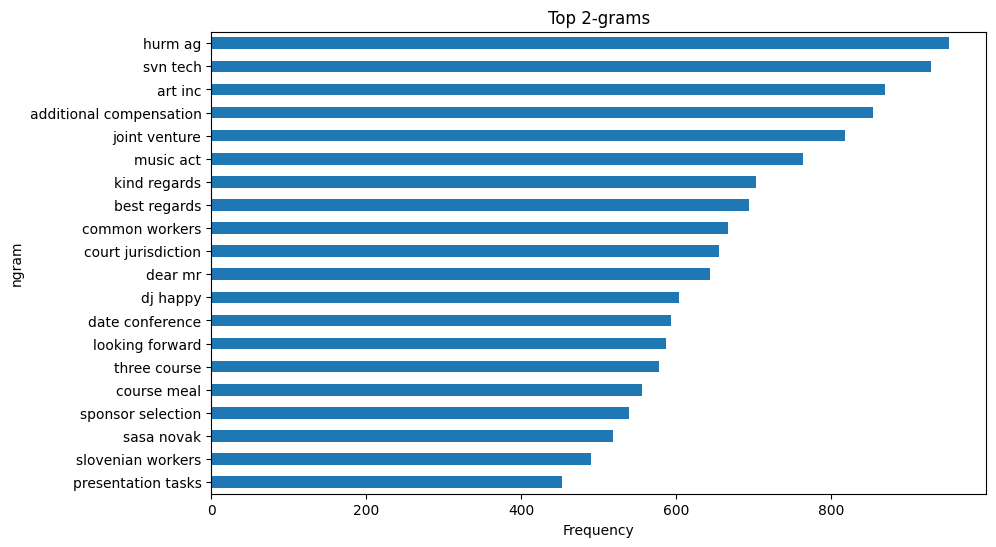

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

# Ensure stop_words is a list
stop_words = list(STOPWORDS)

# Define the function to process n-grams
def plot_top_ngrams_barchart(text_series, n=2):
    # Convert the text series into a list of documents
    corpus = text_series.tolist()

    # Create the CountVectorizer for n-grams
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)

    # Sum up the occurrences of each n-gram
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Select the top 10 n-grams
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])

    # Plot the n-grams
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, figsize=(10, 6))
    plt.gca().invert_yaxis()
    plt.xlabel("Frequency")
    plt.title(f"Top {n}-grams")
    plt.show()

# Use the function
plot_top_ngrams_barchart(df['Content'], 2)  # Example for bigrams


The chart shows the top 2-grams (frequent word pairs) in a text corpus. "hurm ag" and "svn tech" are the most common, followed by "art inc" and "additional compensation". The bigrams suggest themes related to business, legal matters (e.g., "joint venture," "court jurisdiction"), and formal communication ("kind regards," "best regards"). The data likely comes from corporate or legal documents, with some references to formal emails or correspondence. We will also try out trinomial freauence to test whether we will find out more pattern and analyze the data further.

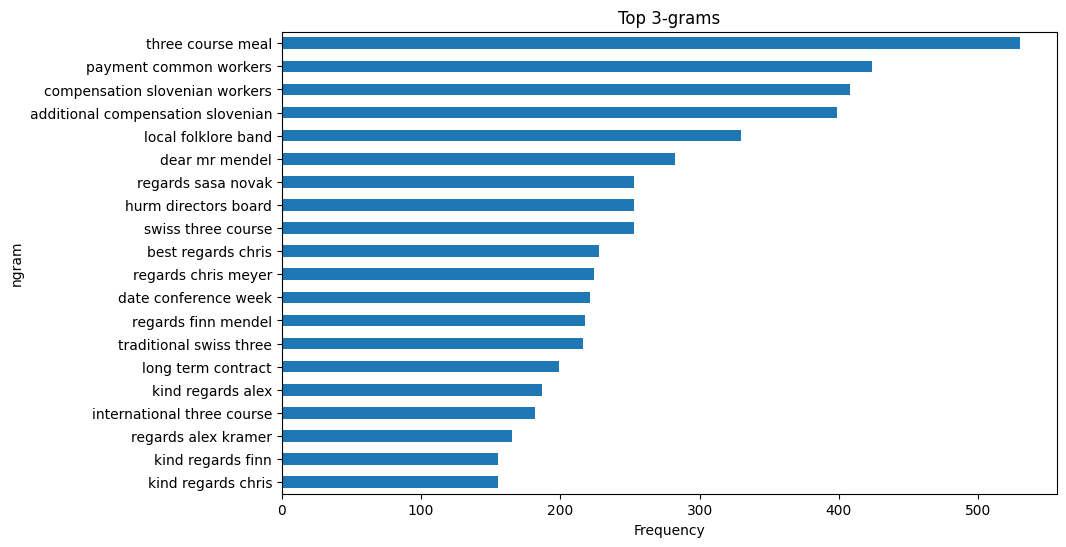

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import STOPWORDS

# Ensure stop_words is a list
stop_words = list(STOPWORDS)

# Define the function to process n-grams
def plot_top_ngrams_barchart(text_series, n=3):
    # Convert the text series into a list of documents
    corpus = text_series.tolist()

    # Create the CountVectorizer for n-grams
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)

    # Sum up the occurrences of each n-gram
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    # Select the top 10 n-grams
    top_ngrams = words_freq[:20]
    ngram_df = pd.DataFrame(top_ngrams, columns=['ngram', 'count'])

    # Plot the n-grams
    ngram_df.plot(kind='barh', x='ngram', y='count', legend=False, figsize=(10, 6))
    plt.gca().invert_yaxis()
    plt.xlabel("Frequency")
    plt.title(f"Top {n}-grams")
    plt.show()

# Use the function
plot_top_ngrams_barchart(df['Content'], 3)  # Example for trigrams


Both frequencies analysis show us different patterns. The binomial more easier and faster pattern that are easier to identify and trinomial helps us understand the context more since it goes fruther into the data.

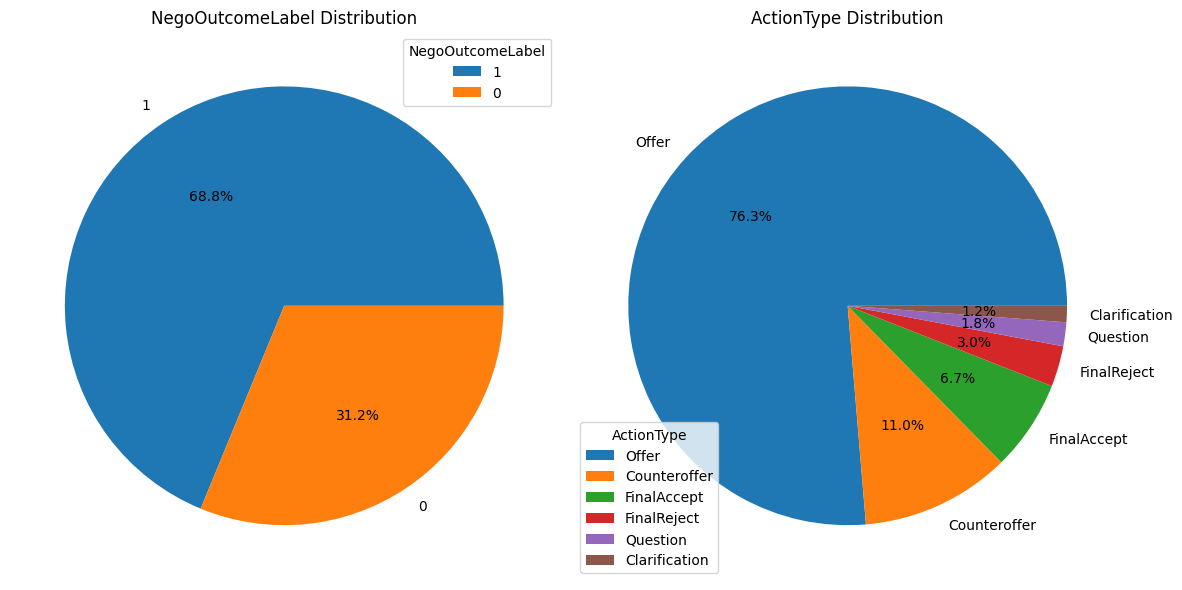

In [60]:
import matplotlib.pyplot as plt

#Plot the pie chart for NegoOutcomeLabel
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(df['NegoOutcomeLabel'].value_counts(), labels=df['NegoOutcomeLabel'].unique().tolist(), autopct='%1.1f%%')
plt.legend(title="NegoOutcomeLabel", loc="best")
plt.title('NegoOutcomeLabel Distribution')

#Plot the pie chart for ActionType
plt.subplot(1, 2, 2)
plt.pie(df['ActionType'].value_counts(), labels=df['ActionType'].unique().tolist(), autopct='%1.1f%%')
plt.legend(title="ActionType", loc="best")
plt.title('ActionType Distribution')

#Show the plots
plt.tight_layout()
plt.show()

# Data Cleansing

#### Removing URLS and revert to lowercase

To avoid any issues and ensure consistency in the processing of the text, we convert all the text to lowercase. This way, “Free” and “free” will be treated as the same word, and our data analysis will be more accurate and reliable.

In [61]:
#df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [62]:
def clean_text(message):
    #lowercasing  better for english word lexicon
    message = message.lower()

    #regular expressions, gerne mal nachschauen wie das funktioniert
    message = re.sub('[.?]', '', message)
    message = re.sub('https?://\S+|www.\S+', '', message)
    message = re.sub('<.?>+', '', message)
    message = re.sub('[%s]' % re.escape(string.punctuation), '', message)
    message = re.sub('\n', '', message)
    message = re.sub('\w\d\w', '', message)

    return message

In [63]:
df['Content'] = df['Content'].apply(lambda x: clean_text(x))
df['Content'].head()

0    dear mr mendel hope you are doing well as the ...
1    dear mr novak thank you for reaching out to me...
2    dear mr mendel thank your kind response – no n...
3    dear mr novak thank you for your swift reply i...
4    dear mr mendel thank you for your proposal and...
Name: Content, dtype: object

URLs are typically not relevant and can be removed from the text data. 

In [64]:
import pandas as pd
import re

# Define a regex pattern to match URLs
url_pattern = re.compile(r'https?://\S+')

# Define a function to remove URLs from text
def remove_urls(text):
    return url_pattern.sub('', text)

# Apply the function to the 'text' column and create a new column 'clean_text'
df['Content'] = df['Content'].apply(remove_urls)

In [65]:
df

SenderID  ReceiverID    ActionType  NegoOutcome  \
0           70          69         Offer  FinalAccept   
1           69          70  Counteroffer  FinalAccept   
2           70          69  Counteroffer  FinalAccept   
3           69          70  Counteroffer  FinalAccept   
4           70          69  Counteroffer  FinalAccept   
...        ...         ...           ...          ...   
2327       851         856  Counteroffer  FinalReject   
2328       856         851  Counteroffer  FinalReject   
2329       851         856  Counteroffer  FinalReject   
2330       856         851  Counteroffer  FinalReject   
2331       851         856   FinalReject  FinalReject   

                                                Content  Content_Length  \
0     dear mr mendel hope you are doing well as the ...            2529   
1     dear mr novak thank you for reaching out to me...            2579   
2     dear mr mendel thank your kind response – no n...            2336   
3     dear mr novak thank you for your swift reply i...            1961   
4     dear mr mendel thank you for your proposal and...            1917   
...                                                 ...             ...   
2327  dear chis meyer thank you for your latest offe...            1755   
2328  dear alex kramerthank you very much for your l...            1460   
2329  dear chris meyerthank you for your fast answer...             673   
2330  dear alex krameri am still very interested in ...             969   
2331  dear chris meyer im so sorry but i can not  ac...             276   

      Sentence_Count  Word_Count  length  WordCount  NegoOutcomeLabel  
0                 17         470    2529        429                 1  
1                 21         483    2579        439                 1  
2                 15         454    2336        409                 1  
3                 13         381    1961        345                 1  
4                 10         376    1917        343                 1  
...              ...         ...     ...        ...               ...  
2327              21         358    1755        338                 0  
2328              17         294    1460        263                 0  
2329              10         144     673        133                 0  
2330               9         191     969        171                 0  
2331               5          60     276         54                 0  

[2332 rows x 11 columns]

### Removing non word and white spaces 

It is essential to remove any characters that are not considered as words or whitespace from the text dataset.These non-word and non-whitespace characters can include punctuation marks, symbols, and other special characters that do not provide any meaningful information for our analysis.

In [66]:
df = df.replace(to_replace=r'[^\w\s]', value='', regex=True)


Normally it would make sense to remove digits when processing NLP since it can interfere with the language but since we are observing negotiations and amounts or percentages of specific values are relevant for the outcome we should reonsider this way.

In [67]:
df = df.replace(to_replace=r'\d', value='', regex=True)


## Pre-processing/Manipulation

Tokenization is the process of breaking down large blocks of text such as paragraphs and sentences into smaller, more manageable units. By performing word tokenization, we can obtain a more accurate representation of the underlying patterns and trends present in the text data



In [68]:
import nltk

#  Download punkt_tab since punkt is not functionin in this case
nltk.download('punkt_tab')


[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

We run a test sentence to see if the tokenizing works fine to apply it to the rest of the content

In [69]:
from nltk.tokenize import word_tokenize

# Simple test to tokenize
test_sentence = "Hello, this is a test sentence!"
print(word_tokenize(test_sentence))


['Hello', ',', 'this', 'is', 'a', 'test', 'sentence', '!']


In [70]:
from nltk.tokenize import word_tokenize

df['Content'] = df['Content'].apply(word_tokenize)

In [71]:
df

SenderID  ReceiverID    ActionType  NegoOutcome  \
0           70          69         Offer  FinalAccept   
1           69          70  Counteroffer  FinalAccept   
2           70          69  Counteroffer  FinalAccept   
3           69          70  Counteroffer  FinalAccept   
4           70          69  Counteroffer  FinalAccept   
...        ...         ...           ...          ...   
2327       851         856  Counteroffer  FinalReject   
2328       856         851  Counteroffer  FinalReject   
2329       851         856  Counteroffer  FinalReject   
2330       856         851  Counteroffer  FinalReject   
2331       851         856   FinalReject  FinalReject   

                                                Content  Content_Length  \
0     [dear, mr, mendel, hope, you, are, doing, well...            2529   
1     [dear, mr, novak, thank, you, for, reaching, o...            2579   
2     [dear, mr, mendel, thank, your, kind, response...            2336   
3     [dear, mr, novak, thank, you, for, your, swift...            1961   
4     [dear, mr, mendel, thank, you, for, your, prop...            1917   
...                                                 ...             ...   
2327  [dear, chis, meyer, thank, you, for, your, lat...            1755   
2328  [dear, alex, kramerthank, you, very, much, for...            1460   
2329  [dear, chris, meyerthank, you, for, your, fast...             673   
2330  [dear, alex, krameri, am, still, very, interes...             969   
2331  [dear, chris, meyer, im, so, sorry, but, i, ca...             276   

      Sentence_Count  Word_Count  length  WordCount  NegoOutcomeLabel  
0                 17         470    2529        429                 1  
1                 21         483    2579        439                 1  
2                 15         454    2336        409                 1  
3                 13         381    1961        345                 1  
4                 10         376    1917        343                 1  
...              ...         ...     ...        ...               ...  
2327              21         358    1755        338                 0  
2328              17         294    1460        263                 0  
2329              10         144     673        133                 0  
2330               9         191     969        171                 0  
2331               5          60     276         54                 0  

[2332 rows x 11 columns]

In the next step we will remove some stopwords to focus more on the enfasis of the main intentions isntead of stop words that may influence our findings. One of the advantages of removing stopwords is that it can reduce the size of the dataset, which in turn reduces the training time required for natural language processing models.

#### Removal of Stopwords

In [72]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
df['Content'] = df['Content'].apply(lambda x: [word for word in x if word not in stop_words])

In [73]:
df

SenderID  ReceiverID    ActionType  NegoOutcome  \
0           70          69         Offer  FinalAccept   
1           69          70  Counteroffer  FinalAccept   
2           70          69  Counteroffer  FinalAccept   
3           69          70  Counteroffer  FinalAccept   
4           70          69  Counteroffer  FinalAccept   
...        ...         ...           ...          ...   
2327       851         856  Counteroffer  FinalReject   
2328       856         851  Counteroffer  FinalReject   
2329       851         856  Counteroffer  FinalReject   
2330       856         851  Counteroffer  FinalReject   
2331       851         856   FinalReject  FinalReject   

                                                Content  Content_Length  \
0     [dear, mr, mendel, hope, well, management, com...            2529   
1     [dear, mr, novak, thank, reaching, mei, apolog...            2579   
2     [dear, mr, mendel, thank, kind, response, need...            2336   
3     [dear, mr, novak, thank, swift, reply, read, s...            1961   
4     [dear, mr, mendel, thank, proposal, efforts, f...            1917   
...                                                 ...             ...   
2327  [dear, chis, meyer, thank, latest, offer, poin...            1755   
2328  [dear, alex, kramerthank, much, latest, offer,...            1460   
2329  [dear, chris, meyerthank, fast, answer, happy,...             673   
2330  [dear, alex, krameri, still, interested, comin...             969   
2331  [dear, chris, meyer, im, sorry, accept, less, ...             276   

      Sentence_Count  Word_Count  length  WordCount  NegoOutcomeLabel  
0                 17         470    2529        429                 1  
1                 21         483    2579        439                 1  
2                 15         454    2336        409                 1  
3                 13         381    1961        345                 1  
4                 10         376    1917        343                 1  
...              ...         ...     ...        ...               ...  
2327              21         358    1755        338                 0  
2328              17         294    1460        263                 0  
2329              10         144     673        133                 0  
2330               9         191     969        171                 0  
2331               5          60     276         54                 0  

[2332 rows x 11 columns]

#### Lemmatization and Stemming

In stemming we cut out the last part of a word to receive the root of a word and make it easier to identify the semantics of the word.

In [74]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import pandas as pd

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Define a function to perform stemming on the 'text' column
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# Define a function to perform stemming on the 'text' column
def stem_words(words):
    return [stemmer.stem(word) for word in words]

# Apply the function to the 'text' column and create a new column 'stemmed_text'
df['stemmed_messages'] = df['Content'].apply(stem_words)

In [75]:
df["stemmed_messages"]

0       [dear, mr, mendel, hope, well, manag, compani,...
1       [dear, mr, novak, thank, reach, mei, apolog, s...
2       [dear, mr, mendel, thank, kind, respons, need,...
3       [dear, mr, novak, thank, swift, repli, read, s...
4       [dear, mr, mendel, thank, propos, effort, far,...
                              ...                        
2327    [dear, chi, meyer, thank, latest, offer, point...
2328    [dear, alex, kramerthank, much, latest, offer,...
2329    [dear, chri, meyerthank, fast, answer, happi, ...
2330    [dear, alex, krameri, still, interest, come, j...
2331    [dear, chri, meyer, im, sorri, accept, less, m...
Name: stemmed_messages, Length: 2332, dtype: object

Next, let’s take a look at how we can implement Lemmatization for the same dataset. Here the algorithm removes influential endings of the words to return the base form knowns as the lemma.



In [76]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
import nltk
nltk.download('wordnet')

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import pandas as pd

# initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# define function to lemmatize tokens
def lemmatize_tokens(tokens):
    # convert POS tag to WordNet format
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)
    
    # lemmatize tokens
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    
    # return lemmatized tokens as a list
    return lemmas

# apply lemmatization function to column of dataframe
df['lemmatized_messages'] = df['Content'].apply(lemmatize_tokens)

[nltk_data] Error loading averaged_perceptron_tagger_eng: <urlopen
[nltk_data]     error [SSL: CERTIFICATE_VERIFY_FAILED] certificate
[nltk_data]     verify failed: unable to get local issuer certificate
[nltk_data]     (_ssl.c:1000)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


In [77]:
df['lemmatized_messages']

0       [dear, mr, mendel, hope, well, management, com...
1       [dear, mr, novak, thank, reach, mei, apologize...
2       [dear, mr, mendel, thank, kind, response, need...
3       [dear, mr, novak, thank, swift, reply, read, s...
4       [dear, mr, mendel, thank, proposal, effort, fa...
                              ...                        
2327    [dear, chi, meyer, thank, late, offer, point, ...
2328    [dear, alex, kramerthank, much, late, offer, h...
2329    [dear, chris, meyerthank, fast, answer, happy,...
2330    [dear, alex, krameri, still, interested, come,...
2331    [dear, chris, meyer, im, sorry, accept, less, ...
Name: lemmatized_messages, Length: 2332, dtype: object

As for our next step we will combine the pre processed content data in order to be able to create a corpus for the content.

In [78]:
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

df['Content'] = df['Content'].apply(lambda x : combine_text(x))
df['Content']

0       dear mr mendel hope well management companies ...
1       dear mr novak thank reaching mei apologize sli...
2       dear mr mendel thank kind response need hurry ...
3       dear mr novak thank swift reply read second se...
4       dear mr mendel thank proposal efforts far seem...
                              ...                        
2327    dear chis meyer thank latest offer points comp...
2328    dear alex kramerthank much latest offer happy ...
2329    dear chris meyerthank fast answer happy found ...
2330    dear alex krameri still interested coming join...
2331    dear chris meyer im sorry accept less mei unde...
Name: Content, Length: 2332, dtype: object

In [79]:
df.head()

SenderID  ReceiverID    ActionType  NegoOutcome  \
0        70          69         Offer  FinalAccept   
1        69          70  Counteroffer  FinalAccept   
2        70          69  Counteroffer  FinalAccept   
3        69          70  Counteroffer  FinalAccept   
4        70          69  Counteroffer  FinalAccept   

                                             Content  Content_Length  \
0  dear mr mendel hope well management companies ...            2529   
1  dear mr novak thank reaching mei apologize sli...            2579   
2  dear mr mendel thank kind response need hurry ...            2336   
3  dear mr novak thank swift reply read second se...            1961   
4  dear mr mendel thank proposal efforts far seem...            1917   

   Sentence_Count  Word_Count  length  WordCount  NegoOutcomeLabel  \
0              17         470    2529        429                 1   
1              21         483    2579        439                 1   
2              15         454    2336        409                 1   
3              13         381    1961        345                 1   
4              10         376    1917        343                 1   

                                    stemmed_messages  \
0  [dear, mr, mendel, hope, well, manag, compani,...   
1  [dear, mr, novak, thank, reach, mei, apolog, s...   
2  [dear, mr, mendel, thank, kind, respons, need,...   
3  [dear, mr, novak, thank, swift, repli, read, s...   
4  [dear, mr, mendel, thank, propos, effort, far,...   

                                 lemmatized_messages  
0  [dear, mr, mendel, hope, well, management, com...  
1  [dear, mr, novak, thank, reach, mei, apologize...  
2  [dear, mr, mendel, thank, kind, response, need...  
3  [dear, mr, novak, thank, swift, reply, read, s...  
4  [dear, mr, mendel, thank, proposal, effort, fa...

In [80]:
# Use the clean data to create a corpus
corpus = []
new = df['Content'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
corpus

['dear',
 'mr',
 'mendel',
 'hope',
 'well',
 'management',
 'companies',
 'agreed',
 'building',
 'fruitful',
 'partnership',
 'face',
 'upcoming',
 'disruptions',
 'market',
 'best',
 'innovation',
 'green',
 'spirit',
 'would',
 'like',
 'introduce',
 'sasa',
 'novak',
 'reaching',
 'tighten',
 'general',
 'terms',
 'hurm',
 'ag',
 'svn',
 'tech',
 'established',
 'first',
 'round',
 'discussions',
 'far',
 'please',
 'find',
 'attached',
 'proposal',
 'open',
 'issues',
 'joint',
 'venture',
 'would',
 'like',
 'explain',
 'following',
 'directors',
 'first',
 'would',
 'like',
 'address',
 'unsolved',
 'issue',
 'number',
 'directors',
 'sent',
 'hurm',
 'ag',
 'svn',
 'tech',
 'since',
 'agreed',
 'decisionmaking',
 'committee',
 'consisting',
 'members',
 'simple',
 'majority',
 'power',
 'strongly',
 'suggest',
 'dividing',
 'seats',
 'svn',
 'tech',
 'would',
 'able',
 'deal',
 'local',
 'authorities',
 'partners',
 'successfully',
 'using',
 'strong',
 'local',
 'network',
 '

In [81]:
len(corpus) # the corpus consists out of 261584 words

261584

# Representation Techniques

In the next chapter we will run some representation techiques like TD-IDF, Word embeddings and many more to come closer to our end conclusion and main part thats about applying ML techniques to model the data and predict the output

## Bag of Words

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
count_vectorizer = CountVectorizer()
message_vector = count_vectorizer.fit_transform(df['Content'])
message_vector

<2332x9858 sparse matrix of type '<class 'numpy.int64'>'
	with 196620 stored elements in Compressed Sparse Row format>

In [84]:
message_array = message_vector.toarray()
df_countvectorizer = pd.DataFrame(data = message_array, columns=count_vectorizer.get_feature_names_out())
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [85]:
df_countvectorizer.columns

Index(['abandon', 'abandoned', 'abandoning', 'abdicate', 'aber', 'abiding',
       'abilities', 'ability', 'abilty', 'able',
       ...
       'zürich', 'áfter', 'ánd', 'ítems', 'óf', 'última', 'ülan', 'šimi',
       'šimic', 'μr'],
      dtype='object', length=9858)

In [86]:
count_vectorizer_ngrams = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df = 0.01, max_df = 0.99, max_features = 5000) # Define the count vectorizer with n-
message_vector_ngrams = count_vectorizer_ngrams.fit_transform(df['Content']) # Fit and transform the data

In [87]:
message_vector_ngrams.shape

(2332, 1655)

In [88]:
message_ngrams_array = message_vector_ngrams.toarray()
df_countvectorizer_ngrams = pd.DataFrame(data = message_ngrams_array, columns=count_vectorizer_ngrams.get_feature_names_out())
df_countvectorizer_ngrams

able  able attend  abroad  absent  absolutely  accept  \
0        1            0       0       0           0       0   
1        0            0       0       0           0       0   
2        0            0       0       0           0       0   
3        0            0       0       0           0       0   
4        0            0       0       0           0       0   
...    ...          ...     ...     ...         ...     ...   
2327     0            0       0       0           0       0   
2328     0            0       0       0           0       1   
2329     0            0       0       0           0       0   
2330     0            0       0       0           0       3   
2331     0            0       0       0           0       1   

      accept additional  accept offer  accept proposal  acceptable  ...  \
0                     0             0                0           0  ...   
1                     0             0                0           0  ...   
2                     0             0                0           0  ...   
3                     0             0                0           1  ...   
4                     0             0                0           0  ...   
...                 ...           ...              ...         ...  ...   
2327                  0             0                0           0  ...   
2328                  0             0                0           0  ...   
2329                  0             0                0           0  ...   
2330                  0             0                0           1  ...   
2331                  0             0                0           0  ...   

      wrong  wrote  year  years  yes  young  young people  younger  youre  \
0         0      0     0      0    0      0             0        0      0   
1         0      0     0      0    0      0             0        0      0   
2         0      0     0      0    0      0             0        0      0   
3         0      0     0      0    0      0             0        0      0   
4         0      0     0      0    0      0             0        0      0   
...     ...    ...   ...    ...  ...    ...           ...      ...    ...   
2327      0      0     0      0    0      0             0        0      0   
2328      0      0     0      0    0      0             0        3      1   
2329      0      0     0      0    0      0             0        0      0   
2330      0      0     0      0    0      0             0        0      0   
2331      0      0     0      0    0      0             0        0      0   

      zurich  
0          0  
1          0  
2          0  
3          0  
4          0  
...      ...  
2327       0  
2328       0  
2329       0  
2330       0  
2331       0  

[2332 rows x 1655 columns]

## TF-IDF Vectorization

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [90]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(df['Content'])
tfidf_message_vector = tfidf_vectorizer.transform(df['Content'])

In [91]:
tfidf_message_vector.shape

(2332, 9858)

In [92]:
message_tfidf_array = tfidf_message_vector.toarray()
df_tfidf = pd.DataFrame(data = message_tfidf_array, columns=tfidf_vectorizer.get_feature_names_out())
print(df_tfidf)

      abandon  abandoned  abandoning  abdicate  aber  abiding  abilities  \
0         0.0        0.0         0.0       0.0   0.0      0.0        0.0   
1         0.0        0.0         0.0       0.0   0.0      0.0        0.0   
2         0.0        0.0         0.0       0.0   0.0      0.0        0.0   
3         0.0        0.0         0.0       0.0   0.0      0.0        0.0   
4         0.0        0.0         0.0       0.0   0.0      0.0        0.0   
...       ...        ...         ...       ...   ...      ...        ...   
2327      0.0        0.0         0.0       0.0   0.0      0.0        0.0   
2328      0.0        0.0         0.0       0.0   0.0      0.0        0.0   
2329      0.0        0.0         0.0       0.0   0.0      0.0        0.0   
2330      0.0        0.0         0.0       0.0   0.0      0.0        0.0   
2331      0.0        0.0         0.0       0.0   0.0      0.0        0.0   

      ability  abilty      able  ...    zürich  áfter  ánd  ítems   óf  \
0         0.0

## Word Embeddings

In [93]:
#%pip install scipy==1.12

In [94]:
import nltk
#nltk.download('vader_lexicon')
nltk.download("word2vec_sample")

[nltk_data] Error loading word2vec_sample: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [95]:
#%pip install gensim

In [96]:
import gensim
from nltk.data import find

word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
pre_w2v_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

In [97]:
len(pre_w2v_model.key_to_index)

43981

In [98]:
len(pre_w2v_model['negotiation'])

300

In [99]:
pre_w2v_model.most_similar(positive=["negotiation"], topn=20)

[('negotiations', 0.8168568015098572),
 ('negotiating', 0.7531847357749939),
 ('bargaining', 0.6434566378593445),
 ('negotiate', 0.6341554522514343),
 ('negotiated', 0.6292652487754822),
 ('talks', 0.6133744716644287),
 ('discussions', 0.6095365881919861),
 ('dialogue', 0.5417248606681824),
 ('haggling', 0.5341888070106506),
 ('agreement', 0.501986026763916),
 ('impasse', 0.4880932867527008),
 ('consultations', 0.4769951105117798),
 ('discussion', 0.4654763638973236),
 ('compromise', 0.4547061026096344),
 ('Discussions', 0.4485512673854828),
 ('brinkmanship', 0.44761836528778076),
 ('agreements', 0.4455186426639557),
 ('ratification', 0.4414721131324768),
 ('preconditions', 0.435526579618454),
 ('tripartite', 0.4344906210899353)]

In [100]:
pre_w2v_model.most_similar(positive=["negotiation"], negative=["agreement"], topn=10)

[('diplomacy', 0.323906272649765),
 ('dialogue', 0.29187703132629395),
 ('Interviewing', 0.28622379899024963),
 ('politicking', 0.28376883268356323),
 ('tactful', 0.2724672555923462),
 ('debates', 0.2721523642539978),
 ('bargaining', 0.2721068263053894),
 ('negotiations', 0.270591139793396),
 ('circumlocution', 0.2700679302215576),
 ('brinkmanship', 0.2678378224372864)]

In [101]:
print(pre_w2v_model)

KeyedVectors<vector_size=300, 43981 keys>


In [102]:
pre_w2v_model["negotiation"]

array([ 0.00503933,  0.0736899 , -0.0289142 ,  0.0624547 ,  0.0555153 ,
       -0.00116173,  0.0282533 , -0.0617938 ,  0.0565066 ,  0.0799685 ,
       -0.105743  ,  0.0134658 , -0.0305665 ,  0.0114005 , -0.107065  ,
        0.0806294 ,  0.1183    ,  0.00462627,  0.0256097 , -0.0156963 ,
        0.00078481,  0.067081  ,  0.00380015,  0.0852556 ,  0.0328796 ,
        0.0591502 , -0.109709  , -0.073029  ,  0.00805467, -0.044941  ,
        0.00305665, -0.0213139 , -0.0421321 ,  0.0456018 ,  0.0859165 ,
        0.0627852 , -0.00082612,  0.00636113,  0.0684028 , -0.148041  ,
        0.041306  ,  0.0391581 , -0.0366797 ,  0.0156137 , -0.15465   ,
        0.0105743 ,  0.00328383,  0.0137962 , -0.136145  ,  0.0845947 ,
       -0.00850904, -0.00950039, -0.0489063 , -0.035358  , -0.016605  ,
        0.0342014 ,  0.0472541 ,  0.00570023,  0.0614634 ,  0.041306  ,
       -0.142754  ,  0.0555153 , -0.0290794 ,  0.1031    ,  0.0138788 ,
        0.0829425 ,  0.03321   ,  0.0345318 ,  0.027262  , -0.11

## Self Trained embeddings

In [103]:
df['Content']

0       dear mr mendel hope well management companies ...
1       dear mr novak thank reaching mei apologize sli...
2       dear mr mendel thank kind response need hurry ...
3       dear mr novak thank swift reply read second se...
4       dear mr mendel thank proposal efforts far seem...
                              ...                        
2327    dear chis meyer thank latest offer points comp...
2328    dear alex kramerthank much latest offer happy ...
2329    dear chris meyerthank fast answer happy found ...
2330    dear alex krameri still interested coming join...
2331    dear chris meyer im sorry accept less mei unde...
Name: Content, Length: 2332, dtype: object

In [104]:
nego_message_data = df["Content"]
df_nego_message_data = pd.DataFrame(nego_message_data)
df_nego_message_data

Content
0     dear mr mendel hope well management companies ...
1     dear mr novak thank reaching mei apologize sli...
2     dear mr mendel thank kind response need hurry ...
3     dear mr novak thank swift reply read second se...
4     dear mr mendel thank proposal efforts far seem...
...                                                 ...
2327  dear chis meyer thank latest offer points comp...
2328  dear alex kramerthank much latest offer happy ...
2329  dear chris meyerthank fast answer happy found ...
2330  dear alex krameri still interested coming join...
2331  dear chris meyer im sorry accept less mei unde...

[2332 rows x 1 columns]

In [105]:
import nltk
from nltk.tokenize import word_tokenize

# Download the "punkt" model if not already preinstalled as before ind pre processing
nltk.download('punkt_tab')


df_nego_message_data['Tolenized_Content'] = df_nego_message_data['Content'].apply(word_tokenize)
df_nego_message_data

[nltk_data] Error loading punkt_tab: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


Content  \
0     dear mr mendel hope well management companies ...   
1     dear mr novak thank reaching mei apologize sli...   
2     dear mr mendel thank kind response need hurry ...   
3     dear mr novak thank swift reply read second se...   
4     dear mr mendel thank proposal efforts far seem...   
...                                                 ...   
2327  dear chis meyer thank latest offer points comp...   
2328  dear alex kramerthank much latest offer happy ...   
2329  dear chris meyerthank fast answer happy found ...   
2330  dear alex krameri still interested coming join...   
2331  dear chris meyer im sorry accept less mei unde...   

                                      Tolenized_Content  
0     [dear, mr, mendel, hope, well, management, com...  
1     [dear, mr, novak, thank, reaching, mei, apolog...  
2     [dear, mr, mendel, thank, kind, response, need...  
3     [dear, mr, novak, thank, swift, reply, read, s...  
4     [dear, mr, mendel, thank, proposal, efforts, f...  
...                                                 ...  
2327  [dear, chis, meyer, thank, latest, offer, poin...  
2328  [dear, alex, kramerthank, much, latest, offer,...  
2329  [dear, chris, meyerthank, fast, answer, happy,...  
2330  [dear, alex, krameri, still, interested, comin...  
2331  [dear, chris, meyer, im, sorry, accept, less, ...  

[2332 rows x 2 columns]

In [106]:
sentences = df_nego_message_data['Tolenized_Content'].tolist()
sentences

[['dear',
  'mr',
  'mendel',
  'hope',
  'well',
  'management',
  'companies',
  'agreed',
  'building',
  'fruitful',
  'partnership',
  'face',
  'upcoming',
  'disruptions',
  'market',
  'best',
  'innovation',
  'green',
  'spirit',
  'would',
  'like',
  'introduce',
  'sasa',
  'novak',
  'reaching',
  'tighten',
  'general',
  'terms',
  'hurm',
  'ag',
  'svn',
  'tech',
  'established',
  'first',
  'round',
  'discussions',
  'far',
  'please',
  'find',
  'attached',
  'proposal',
  'open',
  'issues',
  'joint',
  'venture',
  'would',
  'like',
  'explain',
  'following',
  'directors',
  'first',
  'would',
  'like',
  'address',
  'unsolved',
  'issue',
  'number',
  'directors',
  'sent',
  'hurm',
  'ag',
  'svn',
  'tech',
  'since',
  'agreed',
  'decisionmaking',
  'committee',
  'consisting',
  'members',
  'simple',
  'majority',
  'power',
  'strongly',
  'suggest',
  'dividing',
  'seats',
  'svn',
  'tech',
  'would',
  'able',
  'deal',
  'local',
  'author

In [107]:
from gensim.models.word2vec import Word2Vec

ourfirst_w2v_model = Word2Vec(sentences=sentences, vector_size=300, window=5, min_count=1, workers=4)
ourfirst_w2v_model.save("ourfirst_w2v_model")
ourfirst_w2v_model

In [108]:
example_vector = ourfirst_w2v_model.wv['accept']
print(example_vector)

[-0.00589155 -0.06558461  0.17343365 -0.10314312 -0.01308844 -0.3722861
  0.6239187   0.93643534  0.09087297  0.02253855  0.13230784  0.08473403
  0.05961223  0.25694025 -0.01035987 -0.34954163  0.4007836   0.5999753
 -0.03492171 -0.36865    -0.18889065  0.32921284  0.14617376  0.32969472
  0.16452324 -0.61335593  0.10074689 -0.8487265   0.06375268 -0.29114485
  0.09540375 -0.16660863 -0.17921506  0.57990307  0.06582598  0.08977991
 -0.15614353 -0.09836003  0.12297004 -0.30829334  0.4764602   0.17965862
 -0.08013876 -0.3219425   0.337671    0.7221214   0.08552252  0.50602394
 -0.42667577 -0.10524587  0.16128148  0.25684884  0.40631345 -0.0504854
  0.1488427   0.2536544   0.34370342  0.23251604  0.24400842  0.0604434
  0.16679727 -0.29708207  0.16391182 -0.10958835 -0.32846928 -0.20720373
 -0.34008878 -0.41338363 -0.5531855  -0.16213793 -0.33722955  0.11529986
  0.36614478  0.09573832  0.13310027  0.49057665 -0.7175749  -0.15259497
 -0.39483553  0.45561197  0.36438045 -0.26675934 -0.053

In [109]:
similartoaccept = ourfirst_w2v_model.wv.most_similar('accept', topn=10)
similartoaccept

[('issuses', 0.9180127382278442),
 ('willing', 0.8910311460494995),
 ('offer', 0.8898476362228394),
 ('made', 0.8769312500953674),
 ('last', 0.8639883399009705),
 ('concessions', 0.8579186201095581),
 ('resort', 0.8570472002029419),
 ('tis', 0.8550739288330078),
 ('acceptable', 0.8483150601387024),
 ('agree', 0.8474863171577454)]

## LSTM-Preprocessing

Install all the necessary packages to use them for the deep learning algorithms.

In [110]:
#%pip install keras

In [111]:
#%pip install tensorflow

In [112]:
#%pip install Keras-Preprocessing

In [113]:
#%pip install tensorflow-text

In [114]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

2025-01-07 13:00:34.481127: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [115]:
sentences

[['dear',
  'mr',
  'mendel',
  'hope',
  'well',
  'management',
  'companies',
  'agreed',
  'building',
  'fruitful',
  'partnership',
  'face',
  'upcoming',
  'disruptions',
  'market',
  'best',
  'innovation',
  'green',
  'spirit',
  'would',
  'like',
  'introduce',
  'sasa',
  'novak',
  'reaching',
  'tighten',
  'general',
  'terms',
  'hurm',
  'ag',
  'svn',
  'tech',
  'established',
  'first',
  'round',
  'discussions',
  'far',
  'please',
  'find',
  'attached',
  'proposal',
  'open',
  'issues',
  'joint',
  'venture',
  'would',
  'like',
  'explain',
  'following',
  'directors',
  'first',
  'would',
  'like',
  'address',
  'unsolved',
  'issue',
  'number',
  'directors',
  'sent',
  'hurm',
  'ag',
  'svn',
  'tech',
  'since',
  'agreed',
  'decisionmaking',
  'committee',
  'consisting',
  'members',
  'simple',
  'majority',
  'power',
  'strongly',
  'suggest',
  'dividing',
  'seats',
  'svn',
  'tech',
  'would',
  'able',
  'deal',
  'local',
  'author

In [116]:
# self-trained W2V
ourfirst_w2v_model

#pre-trained Google pruned W2V
pre_w2v_model

In [117]:
# See how big the vocabulary is for the self-trained W2V model

vocab_size = len(ourfirst_w2v_model.wv.index_to_key)+1  # new method indextokey
embedding_dim = ourfirst_w2v_model.wv.vector_size

In [118]:
vocab_size, embedding_dim

(9871, 300)

In [119]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
word_index

{'would': 1,
 'think': 2,
 'offer': 3,
 'us': 4,
 'week': 5,
 'best': 6,
 'also': 7,
 'event': 8,
 'workers': 9,
 'like': 10,
 'isa': 11,
 'dear': 12,
 'conference': 13,
 'regards': 14,
 'agree': 15,
 'important': 16,
 'additional': 17,
 'good': 18,
 'hurm': 19,
 'local': 20,
 'sponsor': 21,
 'want': 22,
 'music': 23,
 'alex': 24,
 'chris': 25,
 'could': 26,
 'make': 27,
 'compensation': 28,
 'therefore': 29,
 'international': 30,
 'hope': 31,
 'first': 32,
 'engineers': 33,
 'svn': 34,
 'time': 35,
 'really': 36,
 'thank': 37,
 'board': 38,
 'ag': 39,
 'slovenia': 40,
 'know': 41,
 'since': 42,
 'happy': 43,
 'one': 44,
 'joint': 45,
 'slovenian': 46,
 'tech': 47,
 'common': 48,
 'kind': 49,
 'art': 50,
 'issues': 51,
 'date': 52,
 'act': 53,
 'court': 54,
 'point': 55,
 'speech': 56,
 'inc': 57,
 'already': 58,
 'directors': 59,
 'venture': 60,
 'jurisdiction': 61,
 'company': 62,
 'future': 63,
 'novak': 64,
 'course': 65,
 'last': 66,
 'members': 67,
 'forward': 68,
 'mr': 69,
 'mo

In [120]:
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, maxlen=5,padding='post') # LSTM needs fixed length sequences (gleiche Länge)
padded_sequences

array([[ 169,   49,   14,   94,   64],
       [  68,  243,   14,  110,   77],
       [ 260,    6,   14,   94,   64],
       ...,
       [ 160, 5330,    6, 1183,  123],
       [ 260, 5330,    6, 1459,  121],
       [ 185, 1200,    6, 1183,  123]], dtype=int32)

In [121]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if word in ourfirst_w2v_model.wv:
        embedding_matrix[i] = ourfirst_w2v_model.wv[word]


embedding_matrix 

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.21140100e-01,  5.67703903e-01,  3.60242695e-01, ...,
         3.52570653e-01,  2.97241688e-01,  2.37694453e-03],
       [-2.91421562e-01,  4.10294861e-01,  1.93174630e-01, ...,
        -4.73758988e-02,  3.29037309e-01, -3.35962355e-01],
       ...,
       [-2.29262421e-03,  1.84120878e-03, -5.04873041e-03, ...,
        -6.03701733e-03,  1.32378913e-03, -7.47065758e-03],
       [-1.34713470e-03,  1.07903492e-04, -4.73699253e-03, ...,
        -3.71988025e-03,  4.60871961e-03, -1.81925448e-03],
       [-2.06266274e-03, -2.84543284e-03,  1.47621788e-03, ...,
        -3.68085317e-03,  5.40993316e-03,  2.66762078e-03]])

## LSTM-Training

In [122]:
# 3 layers: Embedding, LSTM, Dense # use TRUE in trainable to train the embedding layer around 2,96 Mio parameters to train
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=padded_sequences.shape[1], trainable=True),
    LSTM(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

In [123]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     2,961,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,961,300 (11.30 MB)

 Trainable params: 2,961,300 (11.30 MB)

 Non-trainable params: 0 (0.00 B)

In [124]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [125]:
history = model.fit(padded_sequences, np.array(df['NegoOutcomeLabel']), epochs=20, batch_size=2, validation_split=0.2)

Epoch 1/20
933/933 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.7622 - loss: 0.5381 - val_accuracy: 0.3062 - val_loss: 1.0396
Epoch 2/20
933/933 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.7991 - loss: 0.4858 - val_accuracy: 0.3319 - val_loss: 0.9907
Epoch 3/20
933/933 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8346 - loss: 0.3767 - val_accuracy: 0.4090 - val_loss: 1.0715
Epoch 4/20
933/933 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8488 - loss: 0.3269 - val_accuracy: 0.4197 - val_loss: 1.4812
Epoch 5/20
933/933 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8832 - loss: 0.2713 - val_accuracy: 0.4368 - val_loss: 1.4741
Epoch 6/20
933/933 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8668 - loss: 0.2858 - val_accuracy: 0.4069 - val_loss: 1.8124
Epoch 7/20
933/933 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8740 - loss: 0.2612 - val_accuracy: 0.4454 - val_loss: 1.8576
Epoch 8/20
933/933 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8933 - loss: 0.2348 - 

In [126]:
predictions = model.predict(padded_sequences)
predictions

73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


array([[7.2914058e-01],
       [9.2440534e-01],
       [8.4767526e-01],
       ...,
       [9.9989897e-01],
       [4.0163056e-04],
       [4.4778474e-02]], dtype=float32)

In [127]:
predictions.size

2332

In [128]:
binary_predictions = (predictions > 0.5).astype(int) # convert the predictions to binary
print(binary_predictions)


[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


In [129]:
from sklearn.metrics import classification_report

print(classification_report(df['NegoOutcomeLabel'], binary_predictions))

              precision    recall  f1-score   support

           0       0.91      0.51      0.66       728
           1       0.82      0.98      0.89      1604

    accuracy                           0.83      2332
   macro avg       0.86      0.74      0.77      2332
weighted avg       0.84      0.83      0.82      2332



## RNN vs Transformers

Use recurennt neural networks to find deeper patterns within the corpus and compare it to the use of transformers in the language modeling/processing.
- RNN is used for sequential data in our context to predict the next word in the senctence based on the information from previous words
- a hidden state/memory state is used which preserves information and helps with the predictions way faster
- maybe use LSTM because long term memory is better than short term memory in classical RNN's
- Transformers (Lama,Mistral etc.) are the better ones right now compared to LSTMS/RNN  

#  BERT

In [130]:
!pip install pytorch-pretrained-bert pytorch-nlp


  Obtaining dependency information for pytorch-pretrained-bert from https://files.pythonhosted.org/packages/d7/e0/c08d5553b89973d9a240605b9c12404bcf8227590de62bae27acbcfe076b/pytorch_pretrained_bert-0.6.2-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 1.8 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for pytorch-nlp from https://files.pythonhosted.org/packages/4f/51/f0ee1efb75f7cc2e3065c5da1363d6be2eec79691b2821594f3f2329528c/pytorch_nlp-0.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for torch>=0.4.1 from https://files.pythonhosted.org/packages/79/78/29dcab24a344ffd9ee9549ec0ab2c7885c13df61cde4c65836ee275efaeb/torch-2.2.2-cp312-none-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for boto3 from https://files.pythonhosted.org/packages/69/1b/3a9cea35775be34f260bb10ce9d821ea87d09d5738010d401feb39b97f74/boto3-1.35.93-py3-none-any.whl.metadata
  Obtaining dependency information for filelock from http

In [133]:
#pip install transformers

  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/f2/3a/8bdab26e09c5a242182b7ba9152e216d5ab4ae2d78c4298eb4872549cd35/transformers-4.47.1-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 876.1 kB/s eta 0:00:00 0:00:01
  Obtaining dependency information for huggingface-hub<1.0,>=0.24.0 from https://files.pythonhosted.org/packages/6c/3f/50f6b25fafdcfb1c089187a328c95081abf882309afd86f4053951507cd1/huggingface_hub-0.27.1-py3-none-any.whl.metadata
  Obtaining dependency information for tokenizers<0.22,>=0.21 from https://files.pythonhosted.org/packages/b0/5c/8b09607b37e996dc47e70d6a7b6f4bdd4e4d5ab22fe49d7374565c7fefaf/tokenizers-0.21.0-cp39-abi3-macosx_10_12_x86_64.whl.metadata
  Obtaining dependency information for safetensors>=0.4.1 from https://files.pythonhosted.org/packages/7b/8b/1e0ac27be12e44ed319fb7890ff5f2779bfbe7ce2f25209850ea8361f6d2/safetensors-0.5.1-cp38-abi3-macosx_10_12_x86_64.whl.metadata
   ━━━

In [134]:
import torch
from torch.utils.data import TensorDataset, Dataset, DataLoader, RandomSampler, SequentialSampler

from keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

# Model (Hugging Face)
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW, get_scheduler

In [136]:
sentences = df_nego_message_data.Content.values
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]

labels = df.NegoOutcomeLabel.values

In [137]:
sentences

['[CLS] dear mr mendel hope well management companies agreed building fruitful partnership face upcoming disruptions market best innovation green spirit would like introduce sasa novak reaching tighten general terms hurm ag svn tech established first round discussions far please find attached proposal open issues joint venture would like explain following directors first would like address unsolved issue number directors sent hurm ag svn tech since agreed decisionmaking committee consisting members simple majority power strongly suggest dividing seats svn tech would able deal local authorities partners successfully using strong local network relationships engineers develop thorough convenient product sharing experiences sides inspiring essential thus looking forward set production process valuable input engineers work months together make adaptions improve product experience may take months common workers establishing high joint utility seek solution equally distributed assets facing u